Homework #2 exercises 8, 9, 10, & 15.

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ISLP

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 58.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 58.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=67cc08e3b859302413b89263227d59a3c87cd75ce00317ce826b0fac8d768fb4
  Stored in directory: /home/codespace/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built aut

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import ISLP

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

In [6]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [7]:
auto= pd.read_csv('Auto.csv') 
print(auto.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Question 8

In [8]:
#(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and 
# horsepower as the predictor. Use the summarize() function to print the results. Comment on the output.
auto_df = pd.DataFrame(auto)

auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')

# Drop any rows with missing values
auto_df.dropna(subset=['mpg', 'horsepower'], inplace=True)

X = auto_df['horsepower']
y = auto_df['mpg']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


Comments on output:
The p-value for horsepower is 0.0, which is far below the threshold of 0.05. This suggests that we reject the null hypothesis and conclude that horsepower has a significant effect on mpg.

To predict the mpg associated with a horsepower of 98, we can use the regression equation derived from the output:
mpg=const+ (horsepower coefficient × horsepower)
mpg=39.9359+(−0.1578×98) = 24.4815

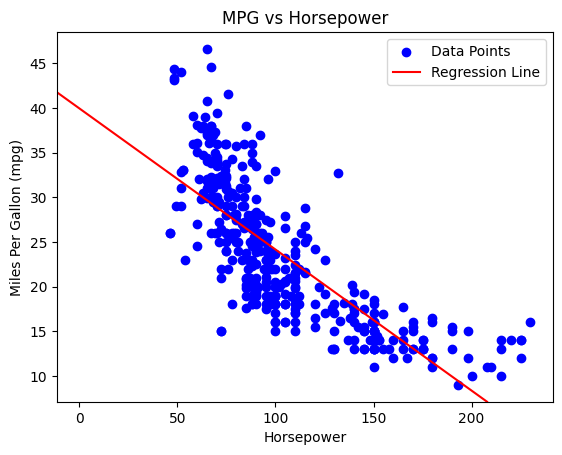

In [9]:
# (b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or
# the abline() function defined in the lab to display the least squares regression line.

slope = model.params['horsepower']
intercept = model.params['const']

fig, ax = plt.subplots()

ax.scatter(auto_df['horsepower'], auto_df['mpg'], color='blue', label='Data Points')

ax.axline((0, intercept), slope=slope, color='red', label='Regression Line')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles Per Gallon (mpg)')
ax.set_title('MPG vs Horsepower')
ax.legend()

plt.show()

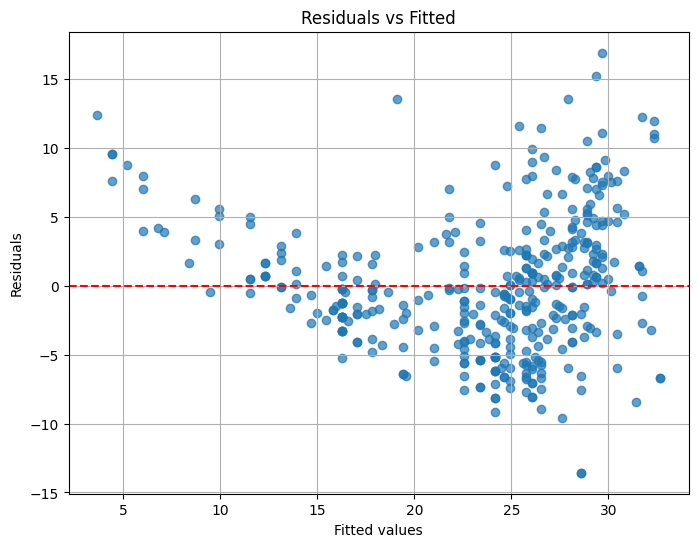

In [10]:
# (c) Produce some of diagnostic plots of the least squares regression fit as described in 
# the lab. Comment on any problems you see with the fit.
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, alpha=0.7)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

This pattern suggests that the linear model may not be appropriate for the data. The relationship between the predictor and response variable is not purely linear, and there may be additional factors influencing the response that are not being accounted for.

Question 9

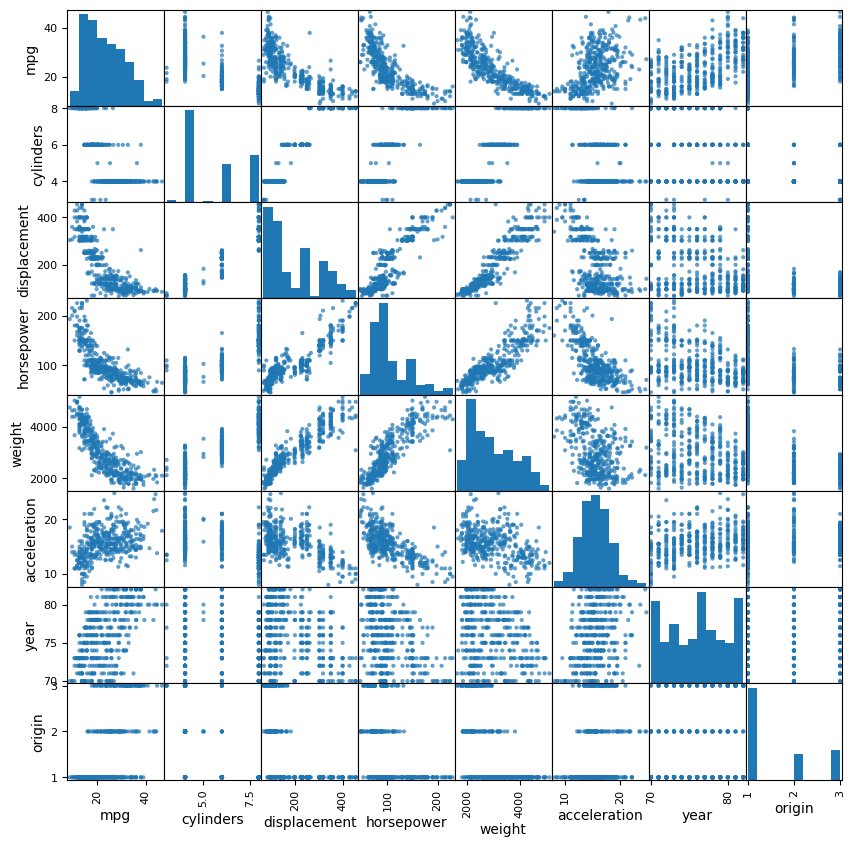

In [11]:
# (a) Produce a scatterplot matrix which includes all of the variables in the data set.
scatter_matrix(auto_df, alpha=0.7, figsize=(10, 10))

plt.show()

In [12]:
#(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

df = auto_df.drop(columns=['name'])

correlation_matrix = df.corr()

correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [13]:
# (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response 
#and all other variables except name as the predictors. Use the summarize() function to print the results.

X = df.drop(columns=['mpg'])
y = df['mpg']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


The predictors displacement, weight, year, and origin are statistically significant in predicting mpg.
The positive coefficient for year indicates that as vehicles get newer, their fuel efficiency (mpg) tends to improve.

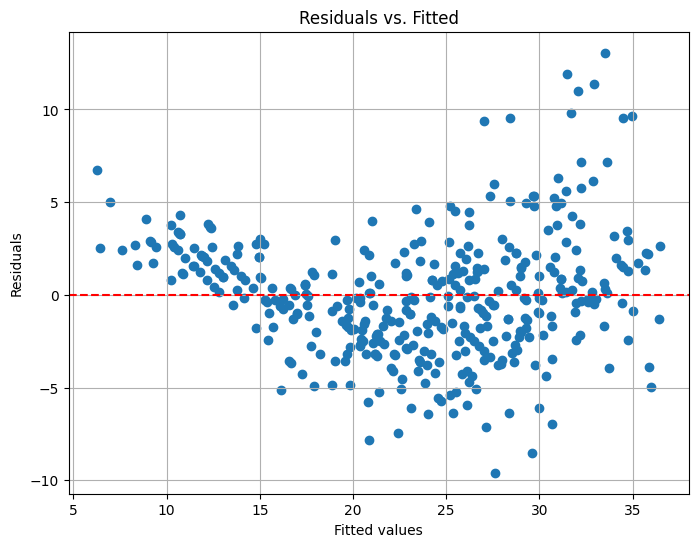

In [14]:
#(d) Produce some of diagnostic plots of the linear regression fit as described in the lab.
# Comment on any problems you see with the fit. Do the residual plots suggest any unusually
# large outliers? Does the leverage plot identify any observations with unusually high leverage?

residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

This residual plot shows a slight funnel shape for increasing fitted values. It is a better representation than the previouse residual plot but there are some outliers when the fitted values are greater than 25. 

In [15]:
#(e) Fit some models with interactions as described in the lab. Do any interactions 
# appear to be statistically significant?

X['cylinders_weight'] = X['cylinders'] * X['weight']
X['displacement_weight'] = X['displacement'] * X['weight']
X['horsepower_weight'] = X['horsepower'] * X['weight']
X['year_weight'] = X['year'] * X['weight']

X = sm.add_constant(X)

model_interaction = sm.OLS(y, X).fit()

summarize(model_interaction)

,coef,std err,t,P>|t|
const,-63.015300,16.605000,-3.795,0.000
cylinders,0.497400,1.475000,0.337,0.736
displacement,-0.038600,0.029000,-1.333,0.183
horsepower,-0.101200,0.051000,-1.995,0.047
weight,0.011100,0.006000,1.987,0.048
acceleration,0.052800,0.096000,0.549,0.583
year,1.531400,0.188000,8.157,0.000
origin,0.636800,0.263000,2.421,0.016
cylinders_weight,-0.000093,0.000000,-0.217,0.828
displacement_weight,0.000013,0.000008,1.613,0.108


The significant interaction between year and weight indicates that as vehicles get newer, their fuel efficiency (mpg) changes differently depending on their weight.

In [16]:
# Try a few different transformations of the variables, such as log(X), √X, X2. 
# Comment on your findings.
y = df['mpg']

# Log Transformation
X_log = np.log1p(df.drop(columns=['mpg']))
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y, X_log).fit()

print("Log Transformation")
summarize(model_log)


Log Transformation


,coef,std err,t,P>|t|
const,-70.8276,17.846,-3.969,0.000
cylinders,1.8449,1.967,0.938,0.349
displacement,-1.1250,1.529,-0.736,0.462
horsepower,-6.9435,1.579,-4.398,0.000
weight,-12.6429,2.223,-5.687,0.000
acceleration,-5.1752,1.719,-3.011,0.003
year,55.5982,3.608,15.408,0.000
origin,2.4882,0.809,3.077,0.002


The log transformation appears to have enhanced the model by making several predictors statistically significant, particularly horsepower, weight, acceleration, year, and origin. The relationships suggest that as horsepower and weight increase, fuel efficiency decreases, while newer vehicles and certain origins lead to better fuel efficiency.

In [17]:
# Square Root Transformation
X_sqrt = np.sqrt(df.drop(columns=['mpg']))
X_sqrt = sm.add_constant(X_sqrt)
model_sqrt = sm.OLS(y, X_sqrt).fit()

print("Square Root Transformation")
summarize(model_sqrt)


Square Root Transformation


,coef,std err,t,P>|t|
const,-49.7981,9.178,-5.426,0.000
cylinders,-0.2370,1.538,-0.154,0.878
displacement,0.2258,0.229,0.984,0.326
horsepower,-0.7798,0.308,-2.533,0.012
weight,-0.6217,0.079,-7.872,0.000
acceleration,-0.8253,0.834,-0.989,0.323
year,12.7903,0.859,14.891,0.000
origin,3.2604,0.768,4.247,0.000


The negative coefficients for horsepower and weight suggest that as these values increase, mpg decreases. The positive coefficients for year and origin indicate that as the year increases and for certain origins, mpg improves.

In [18]:
# Square Transformation
X_square = df.drop(columns=['mpg']) ** 2
X_square = sm.add_constant(X_square)
model_square = sm.OLS(y, X_square).fit()

print("Square Transformation")
summarize(model_square)


Square Transformation


,coef,std err,t,P>|t|
const,1.208000e+00,2.356000e+00,0.513,0.608
cylinders,-8.830000e-02,2.500000e-02,-3.502,0.001
displacement,5.680000e-05,1.380000e-05,4.109,0.000
horsepower,-3.621000e-05,4.980000e-05,-0.728,0.467
weight,-9.351000e-07,8.980000e-08,-10.416,0.000
acceleration,6.300000e-03,3.000000e-03,2.334,0.020
year,5.000000e-03,0.000000e+00,14.160,0.000
origin,4.129000e-01,6.900000e-02,5.971,0.000


The squared transformation has revealed several significant predictors, particularly cylinders, displacement, weight, acceleration, year, and origin. 

Question 10

In [19]:
carseats= pd.read_csv('Carseats.csv') 
print(carseats.head(5))

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [20]:
#(a) Fit a multiple regression model to predict Sales using Price,Urban, and US.

carseats = pd.get_dummies(carseats, columns=['Urban', 'US'], drop_first=True)

carseats['Urban_Yes'] = carseats['Urban_Yes'].astype(int)
carseats['US_Yes'] = carseats['US_Yes'].astype(int)

X = carseats[['Price', 'Urban_Yes', 'US_Yes']]
y = carseats['Sales']

X = sm.add_constant(X)

c_model = sm.OLS(y, X).fit()

summarize(c_model)

,coef,std err,t,P>|t|
const,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban_Yes,-0.0219,0.272,-0.081,0.936
US_Yes,1.2006,0.259,4.635,0.000


(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

Price has a significant negative impact on sales, implying that higher prices may reduce sales volume. Urban location does not significantly affect sales based on this model. Being in the U.S. significantly increases sales.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales=13.0435−0.0545(Price)−0.0219(Urban)+1.2006(US)+ϵ

(d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

You can reject the null hypothesis for
Price: Significant effect on Sales.
US_Yes: Significant effect on Sales.

In [21]:
# (e) On the basis of your response to the previous question, fit a smaller model that 
# only uses the predictors for which there is evidence of association with the outcome.

X_small = carseats[['Price', 'US_Yes']]
y_small = carseats['Sales']

X_small = sm.add_constant(X_small)

model_small = sm.OLS(y_small, X_small).fit()

summarize(model_small)

,coef,std err,t,P>|t|
const,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US_Yes,1.1996,0.258,4.641,0.0


(f) How well do the models in (a) and (e) fit the data?

Both models are very similar but the smaller model (e) is slightly more fit not including the non-significant predictor.

In [22]:
# (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).
confidence_intervals = model_small.conf_int(alpha=0.05)
confidence_intervals.columns = ['Lower CI', 'Upper CI']
confidence_intervals

,Lower CI,Upper CI
const,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


#(h) Is there evidence of outliers or high leverage observations in the model from (e)?

Based on these confidence intervals there appears to be some outliers farther away from the bounds and some high leverage observations in between the higher and lower confiedence intervals.

Question 15.
This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [23]:
Boston= pd.read_csv('Boston (1).csv', index_col= 0) 
Boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [24]:
# (a) For each predictor, fit a simple linear regression model to predict the response. 
# Describe your results.

predictor = 'zn'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


In [25]:
predictor = 'indus'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-2.0637,0.667,-3.093,0.002
indus,0.5098,0.051,9.991,0.000


In [26]:
predictor = 'chas'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,3.7444,0.396,9.453,0.000
chas,-1.8928,1.506,-1.257,0.209


In [27]:
predictor = 'nox'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-13.7199,1.699,-8.073,0.0
nox,31.2485,2.999,10.419,0.0


In [28]:
predictor = 'rm'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,20.4818,3.364,6.088,0.0
rm,-2.6841,0.532,-5.045,0.0


In [29]:
predictor = 'age'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-3.7779,0.944,-4.002,0.0
age,0.1078,0.013,8.463,0.0


In [30]:
predictor = 'dis'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,9.4993,0.730,13.006,0.0
dis,-1.5509,0.168,-9.213,0.0


In [31]:
predictor = 'rad'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-2.2872,0.443,-5.157,0.0
rad,0.6179,0.034,17.998,0.0


In [32]:
predictor = 'tax'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-8.5284,0.816,-10.454,0.0
tax,0.0297,0.002,16.099,0.0


In [33]:
predictor = 'ptratio'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-17.6469,3.147,-5.607,0.0
ptratio,1.1520,0.169,6.801,0.0


In [34]:
predictor = 'lstat'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,-3.3305,0.694,-4.801,0.0
lstat,0.5488,0.048,11.491,0.0


In [35]:
predictor = 'medv'
X = Boston[[predictor]]
y = Boston['crim']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,11.7965,0.934,12.628,0.0
medv,-0.3632,0.038,-9.460,0.0


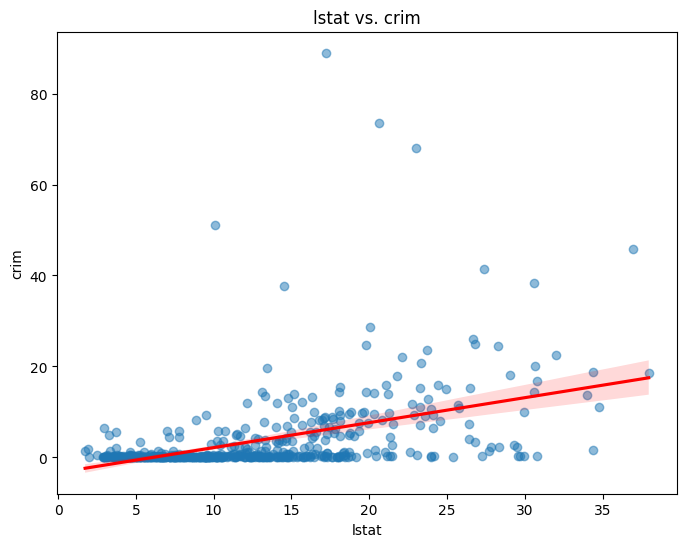

In [36]:
plt.figure(figsize=(8, 6))
sns.regplot(x=Boston['lstat'], y=Boston['crim'], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title(f"{'lstat'} vs. crim")
plt.xlabel('lstat')
plt.ylabel('crim')
plt.show()

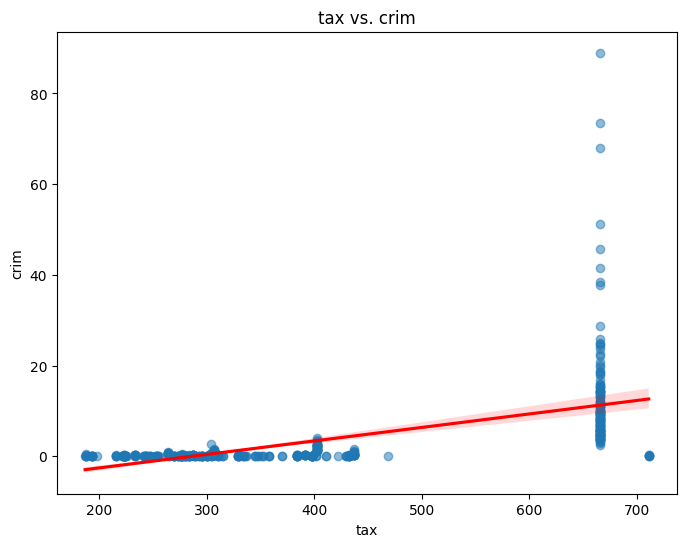

In [37]:
plt.figure(figsize=(8, 6))
sns.regplot(x=Boston['tax'], y=Boston['crim'], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title(f"{'tax'} vs. crim")
plt.xlabel('tax')
plt.ylabel('crim')
plt.show()

The strongest associations to crime appear to be lstat, age, and medv. Many of the predictors have large groupings of outputs like tax around 670 making it difficult to properly do a linear regression that is accurate.

In [38]:
# (b) Fit a multiple regression model to predict the response using all of the predictors. 
# Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

X = Boston.drop('crim', axis=1)
y = Boston['crim']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summarize(model)

,coef,std err,t,P>|t|
const,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


For any predictor with a p-value less than 0.05, we can reject the null hypothesis, indicating that the predictor is statistically significant in the model. So we can reject, indus, chas, nox, rm, age, tax, ptratio, and lstat.

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

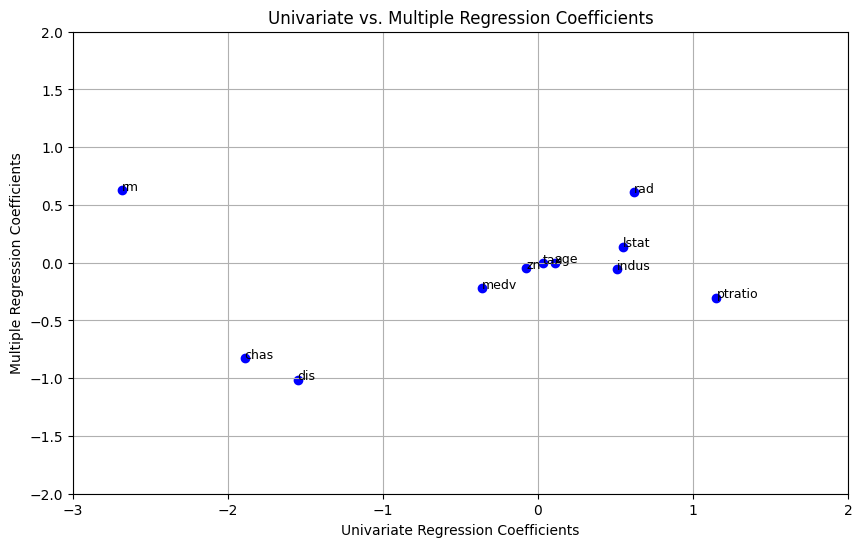

In [39]:
univariate_results = {
    'predictor': ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv'],
    'univariate_coef': [-0.0739, 0.5098, -1.8928, 31.2485, -2.6841, 0.1078, -1.5509, 0.6179, 0.0297, 1.1520, 0.5488, -0.3632]
}

multiple_results = {
    'predictor': ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv'],
    'multiple_coef': [-0.0457, -0.0584, -0.8254, -9.9576, 0.6289, -0.0008, -1.0122, 0.6125, -0.0038, -0.3041, 0.1388, -0.2201]
}

univariate_df = pd.DataFrame(univariate_results)
multiple_df = pd.DataFrame(multiple_results)

merged_df = pd.merge(univariate_df, multiple_df, on='predictor')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['univariate_coef'], merged_df['multiple_coef'], color='blue')

for i in range(len(merged_df)):
    plt.annotate(merged_df['predictor'][i], (merged_df['univariate_coef'][i], merged_df['multiple_coef'][i]), fontsize=9)

plt.title('Univariate vs. Multiple Regression Coefficients')
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.grid()
plt.xlim(-3, 2)
plt.ylim(-2, 2)
plt.show()

Predictor: nox
Univariate Coefficient: 31.2485, p-value: 0.0000
Multiple Coefficient: -9.9576, p-value: 0.0000
Comparison: The univariate model shows a strong positive association between nox and crim, while the multiple regression indicates a significant negative association when accounting for other predictors.
Predictor: rm
Univariate Coefficient: -2.6841, p-value: 0.0000
Multiple Coefficient: 0.6289, p-value: 0.0000
Comparison: The univariate model predicts that more rooms are associated with lower crime rates, while the multiple regression shows a positive association.

In [44]:
# # (d) Is there evidence of non-linear association between any of 
# # the predictors and the response?

non_linear_results = {}
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for predictor in predictors:
    X_poly = Boston[[predictor]].copy() 
    X_poly['X2'] = X_poly[predictor] ** 2
    X_poly['X3'] = X_poly[predictor] ** 3
    X_poly = sm.add_constant(X_poly)

    model_poly = sm.OLS(y, X_poly).fit()
    non_linear_results[predictor] = model_poly

for predictor, model in non_linear_results.items():
    print(f'Polynomial Model for {predictor}:') 
    print(model.summary())

Polynomial Model for zn:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.28e-06
Time:                        03:39:24   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      